# Dicsion Tree
* 1- Dicsion Tree Regressor
* 2- Dicsion Tree Classifier

# 1- Dicsion Tree Regressor

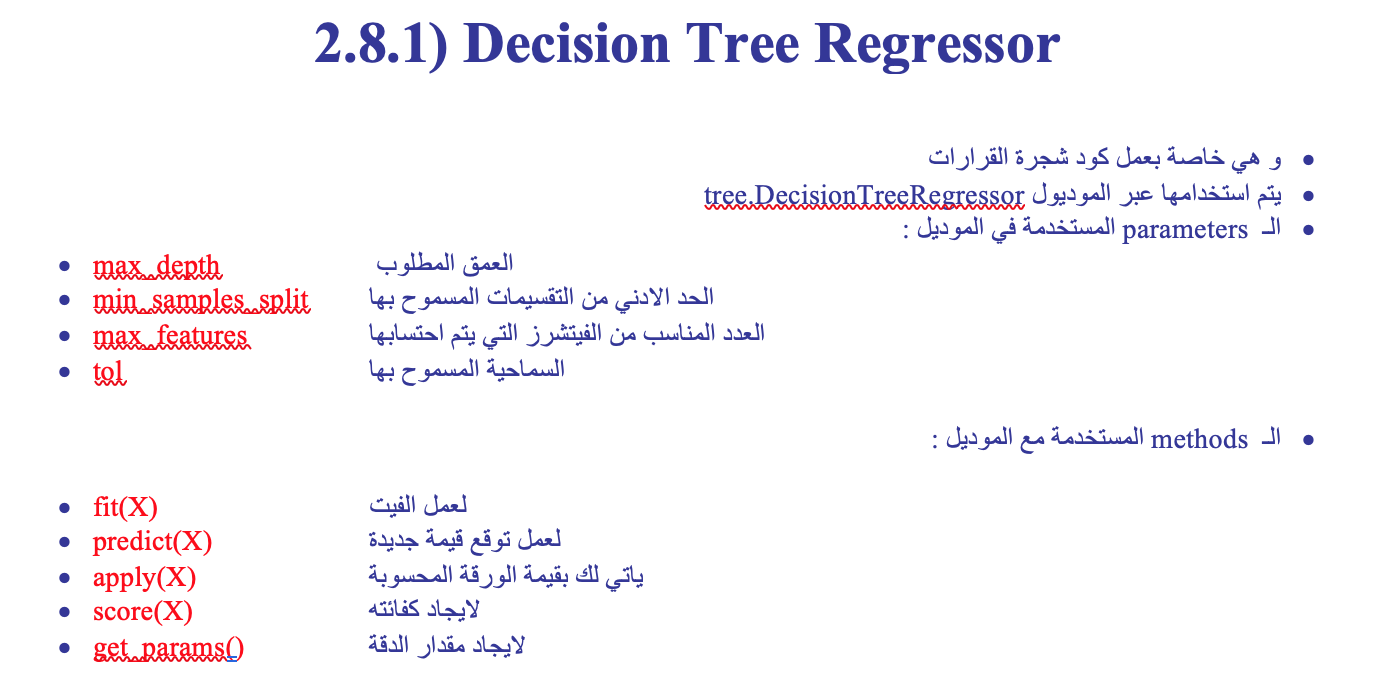

In [1]:
from IPython.display import Image
Image(filename='DTR.png')

In [2]:
'''
sklearn.tree.DecisionTreeRegressor(criterion='mse’, splitter=’best’, max_depth=None,min_samples_split=2,
                                   min_samples_leaf=1,min_weight_fraction_leaf=0.0, max_features=None,
                                   random_state=None, max_leaf_nodes=None,min_impurity_decrease=0.0,
                                   min_impurity_split=None, presort=False)
'''

"\nsklearn.tree.DecisionTreeRegressor(criterion='mse’, splitter=’best’, max_depth=None,min_samples_split=2,\n                                   min_samples_leaf=1,min_weight_fraction_leaf=0.0, max_features=None,\n                                   random_state=None, max_leaf_nodes=None,min_impurity_decrease=0.0,\n                                   min_impurity_split=None, presort=False)\n"

In [200]:
#Import Libraries
from sklearn.datasets import load_boston
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Example 1

In [27]:
#load boston data
data = load_boston()
X = data.data
y = data.target
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [5]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)


In [20]:
#Applying DecisionTreeRegressor Model 
DecisionTreeRegressorModel = DecisionTreeRegressor(max_depth=5, random_state=33)
DecisionTreeRegressorModel.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=33, splitter='best')

In [21]:
#Calculating Details
print('DecisionTreeRegressor Train Score is:\n' , DecisionTreeRegressorModel.score(X_train, y_train))
print('DecisionTreeRegressor Test Score is:\n' , DecisionTreeRegressorModel.score(X_test, y_test))


DecisionTreeRegressor Train Score is:
 0.9377106135839448
DecisionTreeRegressor Test Score is:
 0.8406902736034377


In [22]:
#Calculating Prediction
y_pred = DecisionTreeRegressorModel.predict(X_test)


In [23]:
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is:\n', MAEValue)

#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is:\n', MSEValue)

#Calculating Median Squared Error
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Squared Error Value is:\n', MdSEValue )

Mean Absolute Error Value is:
 2.919818027693906
Mean Squared Error Value is:
 15.669360923464486
Median Squared Error Value is:
 2.183333333333337


### Example 2

In [70]:
dataset = pd.read_csv('data.csv')
X = dataset.iloc[:,0:1].values
y = dataset.iloc[:,-1].values


In [45]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [49]:
# Predicting a new result
y_pred = regressor.predict(np.array(4.8).reshape(-1,1))
y_pred 


array([7025.26923075])

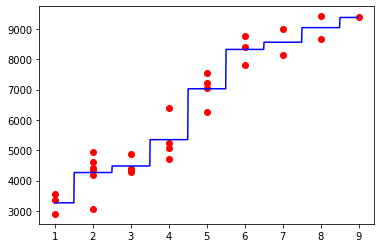

In [67]:
# Visualising the Decision Tree Regression results (higher resolution)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
# X_grid = X_grid.reshape(-1,1)
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')


### Example 3
* comparing with two regressor

In [71]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))


In [73]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)


DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [78]:
# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)


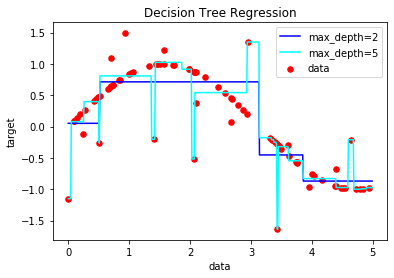

In [101]:
# Plot the results
plt.scatter(X, y, s=30 ,c="red", label="data")
plt.plot(X_test, y_1, color="blue",label="max_depth=2")
plt.plot(X_test, y_2, color="cyan",label="max_depth=5")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# 2- Dicsion Tree Classification

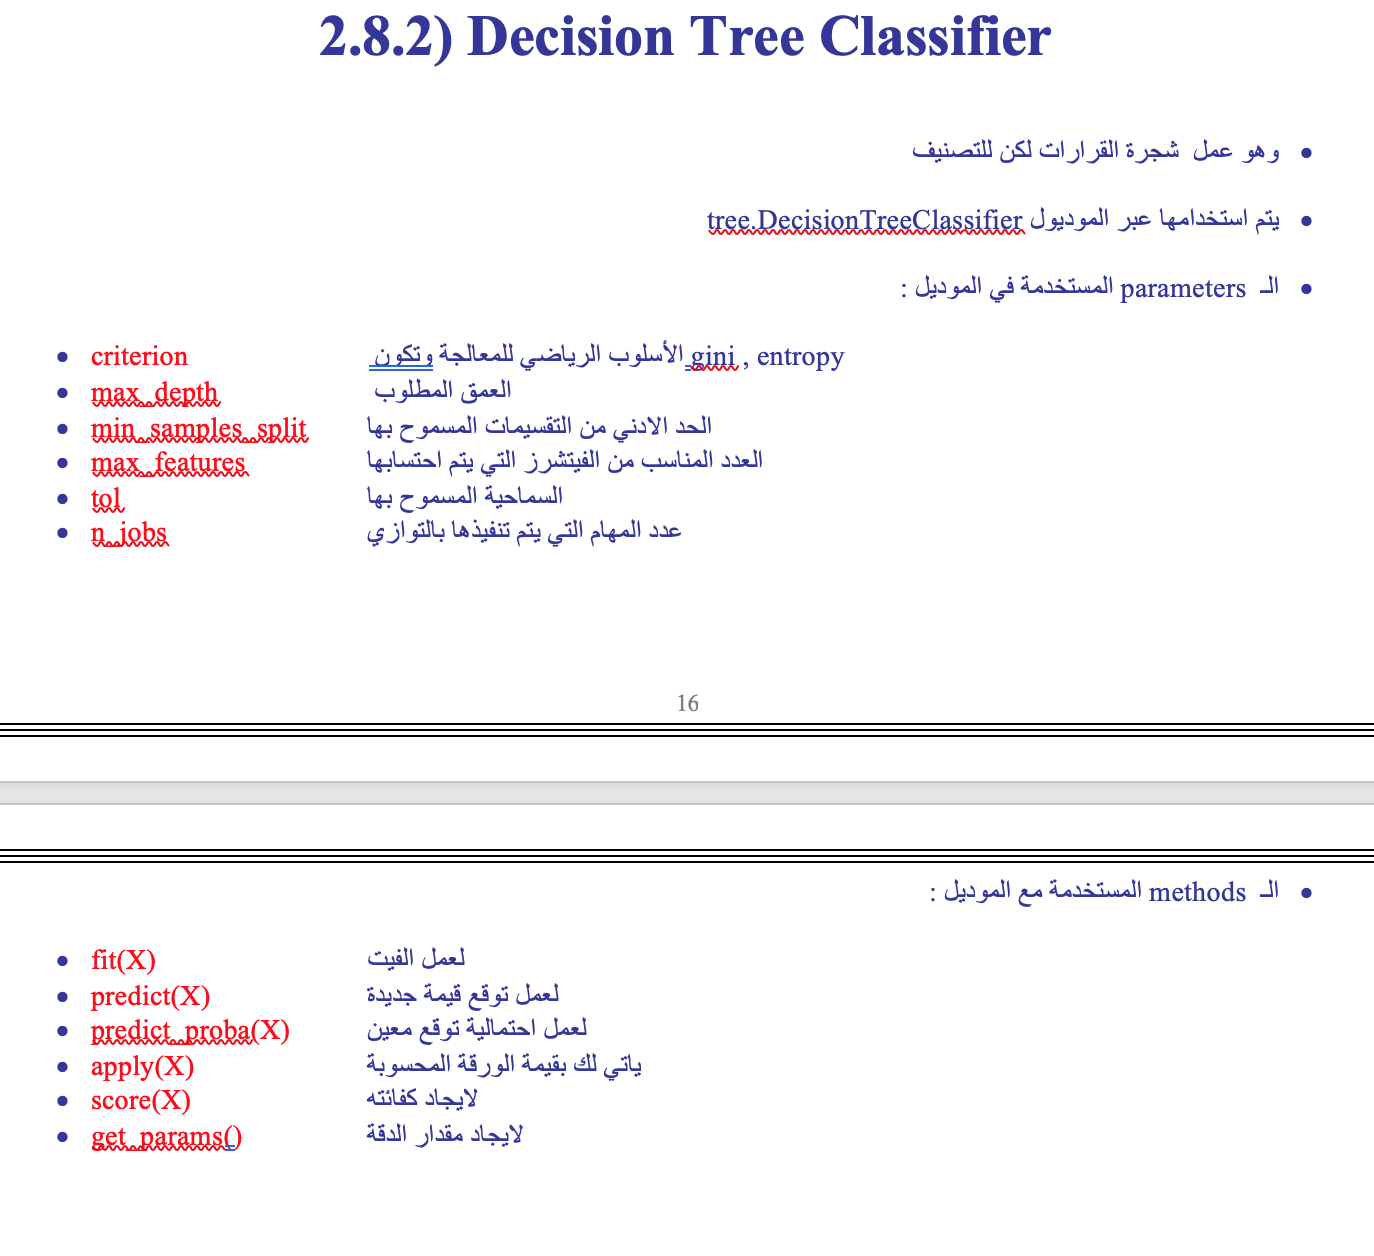

In [103]:
Image(filename='DTC.png')

In [104]:
'''
sklearn.tree.DecisionTreeClassifier(criterion='gini’, splitter=’best’, max_depth=None,min_samples_split=2,
                                    min_samples_leaf=1,min_weight_fraction_leaf=0.0,max_features=None,
                                    random_state=None, max_leaf_nodes=None,min_impurity_decrease=0.0,
                                    min_impurity_split=None, class_weight=None,presort=False)
'''

"\nsklearn.tree.DecisionTreeClassifier(criterion='gini’, splitter=’best’, max_depth=None,min_samples_split=2,\n                                    min_samples_leaf=1,min_weight_fraction_leaf=0.0,max_features=None,\n                                    random_state=None, max_leaf_nodes=None,min_impurity_decrease=0.0,\n                                    min_impurity_split=None, class_weight=None,presort=False)\n"

### Example 1

In [109]:
#load breast cancer data
BreastData = load_breast_cancer()
X = BreastData.data
y = BreastData.target

In [172]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(203, 13)
(100, 13)
(203,)
(100,)


In [128]:
#Applying DecisionTreeClassifier Model 
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=33)
DecisionTreeClassifierModel.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=33, splitter='best')

In [129]:
#Calculating Details
print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(X_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(X_test, y_test))
print('DecisionTreeClassifierModel Classes are : ' , DecisionTreeClassifierModel.classes_)
print("\n")
print('DecisionTreeClassifierModel feature importances are : ' , DecisionTreeClassifierModel.feature_importances_)


DecisionTreeClassifierModel Train Score is :  0.958005249343832
DecisionTreeClassifierModel Test Score is :  0.9202127659574468
DecisionTreeClassifierModel Classes are :  [0 1]


DecisionTreeClassifierModel feature importances are :  [0.         0.         0.         0.         0.         0.
 0.         0.         0.01271514 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.77491015 0.04310067
 0.         0.         0.         0.16927404 0.         0.        ]


In [130]:
#Calculating Prediction
y_pred = DecisionTreeClassifierModel.predict(X_test)
y_pred_prob = DecisionTreeClassifierModel.predict_proba(X_test)
print('Prediction Probabilities Value for DecisionTreeClassifierModel is:\n' , y_pred_prob[:10])


Prediction Probabilities Value for DecisionTreeClassifierModel is:
 [[0.33333333 0.66666667]
 [1.         0.        ]
 [0.01408451 0.98591549]
 [1.         0.        ]
 [0.33333333 0.66666667]
 [0.01408451 0.98591549]
 [0.01408451 0.98591549]
 [1.         0.        ]
 [1.         0.        ]
 [0.01408451 0.98591549]]


Confusion Matrix is : 
 [[ 58  10]
 [  5 115]]


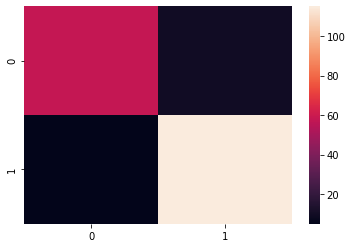

In [131]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)
sns.heatmap(CM)

### Example 2

In [177]:
dataset = pd.read_csv('heart.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:, -1].values


In [178]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(227, 13)
(76, 13)
(227,)
(76,)


In [179]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

In [195]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
DecisionTreeClassifierModel.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [196]:
DecisionTreeClassifierModel.feature_importances_

array([0.05397844, 0.12344209, 0.38667714, 0.        , 0.        ,
       0.        , 0.        , 0.08317908, 0.        , 0.        ,
       0.        , 0.2523493 , 0.10037395])

In [197]:
DecisionTreeClassifierModel.score(X_train, y_train)


0.8546255506607929

In [198]:
y_pred = DecisionTreeClassifierModel.predict(X_test)
print(y_pred.shape)
print(y_test.shape)

(76,)
(76,)


[[24  9]
 [ 9 34]]


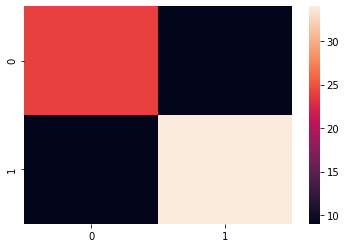

In [199]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm)

### Example 3
* compare between two criterion in DSClassifier

In [229]:
data = pd.read_csv('data2.csv',sep= ',', header= None)
data.head()

,0,1,2,3,4
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [230]:
# X = data.iloc[:,1:5].values
# y = data.iloc[:,0].values
X = data.values[:, 1:5]
y = data.values[:,0]


In [231]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 100)


In [232]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [233]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [234]:
clf_gini.predict([[4, 4, 3, 3]])
clf_entropy.predict([[4, 4, 3, 3]])


array(['R'], dtype=object)

In [235]:
y_pred_gi = clf_gini.predict(X_test)
y_pred_en = clf_entropy.predict(X_test)


In [264]:
print ("Accuracy for gini is     = {:.2f}%".format(accuracy_score(y_test,y_pred_gi)*100))
print ("Accuracy for entropy is  = {:.2f}%".format(accuracy_score(y_test,y_pred_en)*100))


Accuracy for gini is     = 73.40%
Accuracy for entropy is  = 70.74%


The Confusion Metrix of Ginin
 [[ 0  6  7]
 [ 0 67 18]
 [ 0 19 71]]


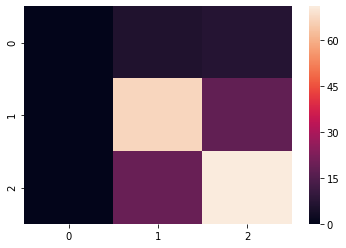

In [267]:
cm_gini = confusion_matrix(y_test, y_pred_gi)
print('The Confusion Metrix of Ginin\n',cm_gini)
sns.heatmap(cm_gini)

The Confusion Metrix of Entropy
 [[ 0  6  7]
 [ 0 63 22]
 [ 0 20 70]]


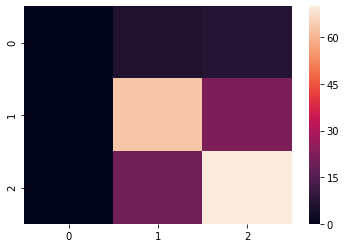

In [269]:
cm_entropy = confusion_matrix(y_test, y_pred_en)
print('The Confusion Metrix of Entropy\n',cm_entropy)
sns.heatmap(cm_entropy)

### Example 4

In [270]:
pima = pd.read_csv("pima-indians-diabetes.csv")
pima.head()
# so, we rename the col nemes

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [271]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("pima-indians-diabetes.csv", header=None, names=col_names)
pima.head()


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [278]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima['label'] # Target variable


In [279]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [288]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
clf.feature_importances_

array([0.04037587, 0.05608894, 0.2307301 , 0.09599818, 0.3068348 ,
       0.13450072, 0.13547139])

In [283]:
print("Accuracy:",accuracy_score(y_test, y_pred))


Accuracy: 0.6753246753246753


The Confusion Metrix
 [[114  32]
 [ 43  42]]


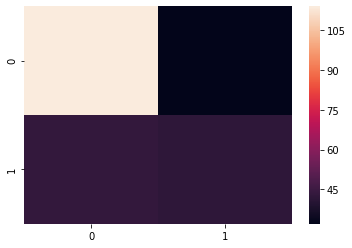

In [286]:
CM = confusion_matrix(y_test, y_pred)
print('The Confusion Metrix\n',CM)
sns.heatmap(CM)